## 项目描述

### 项目概述
海伦使用约会网站寻找约会对象。经过一段时间之后，她发现曾交往过三种类型的人:
* 不喜欢的人
* 魅力一般的人
* 极具魅力的人

她希望：
1. 工作日与魅力一般的人约会
2. 周末与极具魅力的人约会
3. 不喜欢的人则直接排除掉

现在她收集到了一些约会网站未曾记录的数据信息，这更有助于匹配对象的归类。


### 开发流程
```
收集数据：提供文本文件
准备数据：使用 Python 解析文本文件
分析数据：使用 Matplotlib 画二维散点图
训练算法：此步骤不适用于 k-近邻算法
测试算法：使用海伦提供的部分数据作为测试样本。
        测试样本和非测试样本的区别在于：
            测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误。
使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数据以判断对方是否为自己喜欢的类型。
```

> 收集数据：提供文本文件

海伦把这些约会对象的数据存放在文本文件 [datingTestSet2.txt](data/datingTestSet2.txt) 中，总共有 1000 行。海伦约会的对象主要包含以下 3 种特征：

* 每年获得的飞行常客里程数
* 玩视频游戏所耗时间百分比
* 每周消费的冰淇淋公升数

文本文件数据格式如下：
```
40920	8.326976	0.953952	3
14488	7.153469	1.673904	2
26052	1.441871	0.805124	1
75136	13.147394	0.428964	1
38344	1.669788	0.134296	1
```

## 加载数据

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# 支持中文
# 就是那个文件的文件名，记得对照大小写
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

In [3]:
# numpy.loadtxt默认以空格分隔数据，数据类型为float64
data = np.loadtxt("data/datingTestSet2.txt")

In [4]:
data.shape, data.dtype

((1000, 4), dtype('float64'))

In [5]:
data[:3]

array([[4.092000e+04, 8.326976e+00, 9.539520e-01, 3.000000e+00],
       [1.448800e+04, 7.153469e+00, 1.673904e+00, 2.000000e+00],
       [2.605200e+04, 1.441871e+00, 8.051240e-01, 1.000000e+00]])

In [6]:
# df的每一列的数据类型可以不同
data_df = pd.read_csv("data/datingTestSet2.txt",  sep="\t", header=None, 
                      names=["每年飞行里程数", "玩视频游戏所耗时间百分比", "每周消费的冰淇淋公升数", "好感度"] )
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
每年飞行里程数         1000 non-null int64
玩视频游戏所耗时间百分比    1000 non-null float64
每周消费的冰淇淋公升数     1000 non-null float64
好感度             1000 non-null int64
dtypes: float64(2), int64(2)
memory usage: 31.3 KB


In [7]:
data_df.head()

,每年飞行里程数,玩视频游戏所耗时间百分比,每周消费的冰淇淋公升数,好感度
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


In [8]:
data_df["好感度"].value_counts()

1    342
2    331
3    327
Name: 好感度, dtype: int64

## 可视化分析

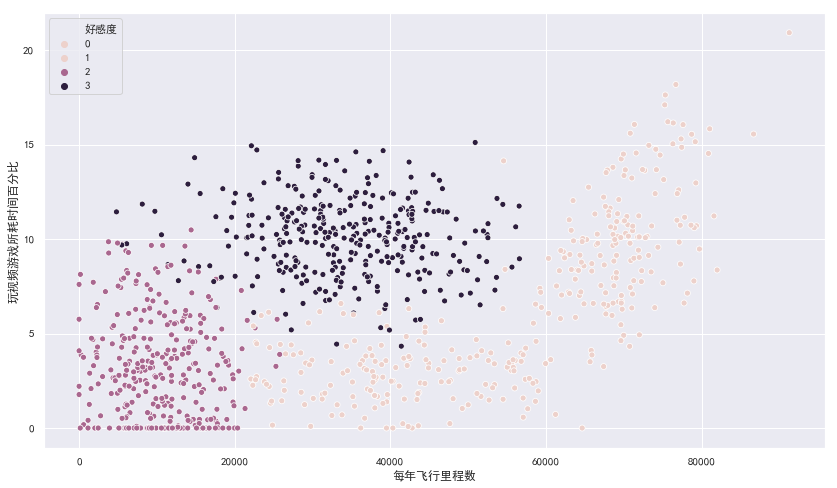

In [9]:
plt.figure(figsize=(14,8))
sns.scatterplot(x="每年飞行里程数", y="玩视频游戏所耗时间百分比", hue="好感度", 
                 data=data_df )

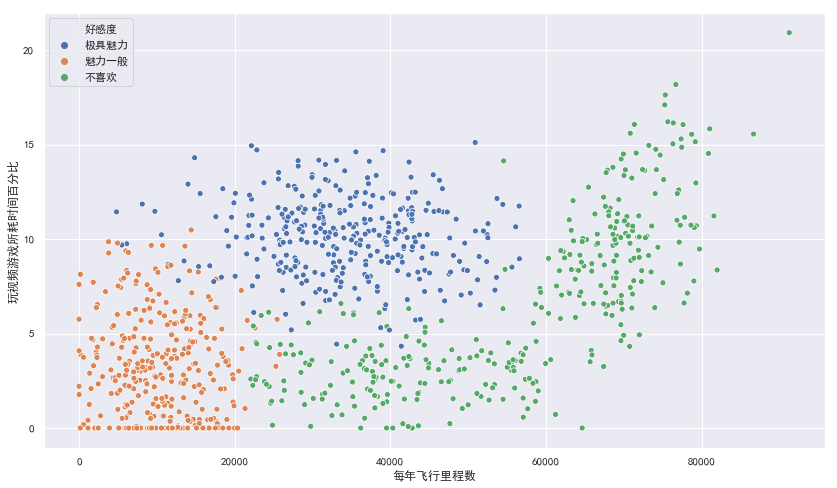

In [10]:
plt.figure(figsize=(14,8))
sns.scatterplot(x="每年飞行里程数", y="玩视频游戏所耗时间百分比", 
                hue=data_df["好感度"].map({1:"不喜欢",2:"魅力一般",3:"极具魅力"}), 
                data=data_df )

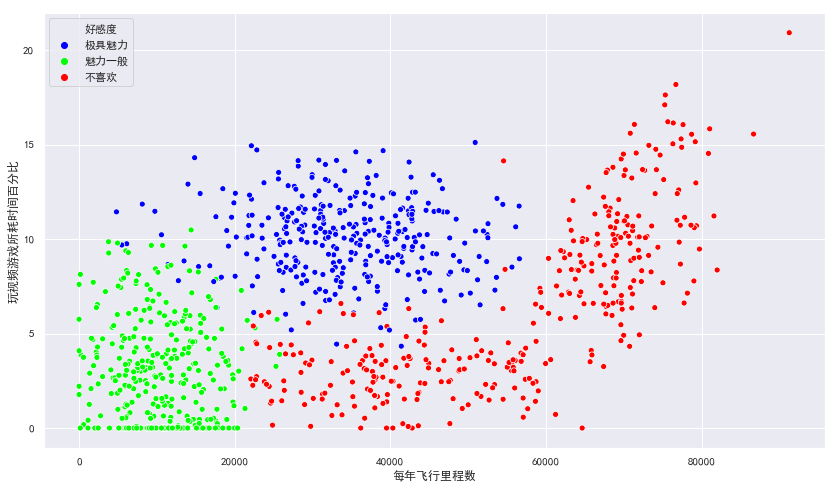

In [11]:
# palette参数既可以使用默认的，也可以自定义颜色
plt.figure(figsize=(14,8))
sns.scatterplot(x="每年飞行里程数", y="玩视频游戏所耗时间百分比", 
                hue=data_df["好感度"].map({1:"不喜欢",2:"魅力一般",3:"极具魅力"}),
                data=data_df,        
                palette= {"不喜欢":"#ff0000","魅力一般":"#00ff00","极具魅力":"#0000ff"})

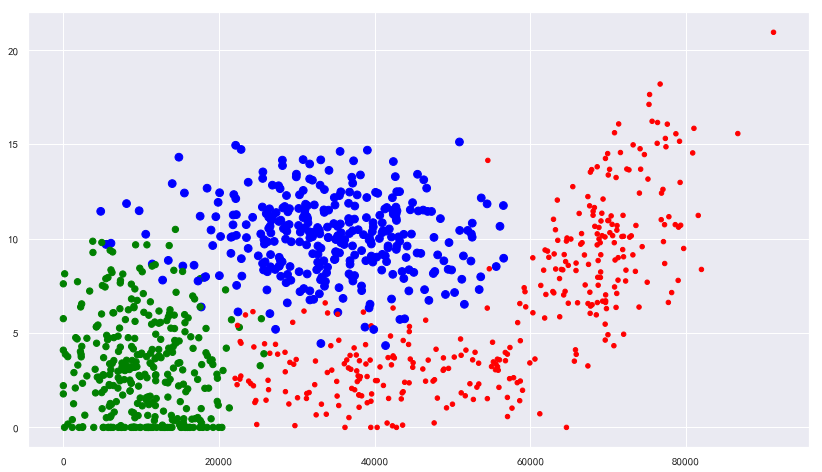

In [12]:
# plt.scatter(x, y, s=None, c=None) s：大小；c：颜色
plt.figure(figsize=(14,8))
plt.scatter(data_df.iloc[:,0], data_df.iloc[:,1], data_df["好感度"]*20, 
            c=data_df["好感度"].map({1:"red",2:"green",3:"blue"}))

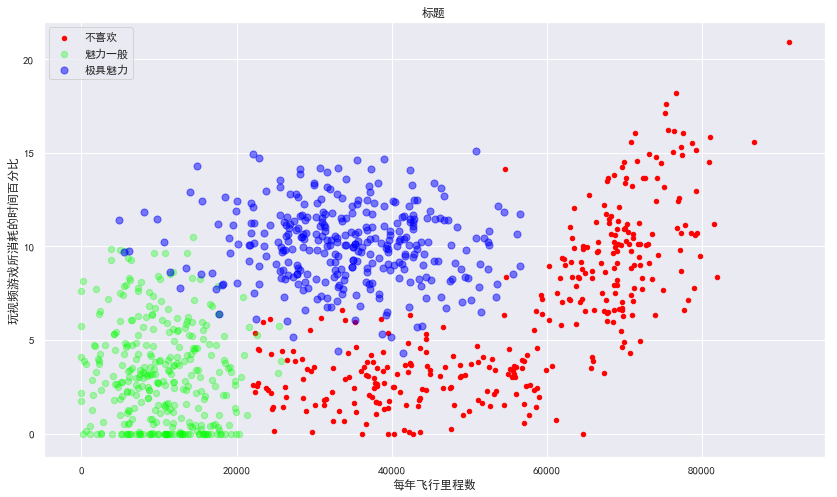

In [13]:
# 显示legend
# 颜色的格式："#ff0000"；"#00ff0050"；(0,0,1,0.7)会有警告，直接用就行了
# 也可以通过alpha参数设置透明度
fig, ax = plt.subplots(figsize=(14,8))
temp = data_df[data_df["好感度"]==1]
scatter1 = ax.scatter(temp.iloc[:,0], temp.iloc[:,1], s= 20, c="#ff0000")
temp = data_df[data_df["好感度"]==2]
scatter2 = ax.scatter(temp.iloc[:,0], temp.iloc[:,1], s= 40, c="#00ff0050")
temp = data_df[data_df["好感度"]==3]
scatter3 = ax.scatter(temp.iloc[:,0], temp.iloc[:,1], s= 50, c="#0000FF", alpha=0.5)
plt.title('标题')
plt.xlabel('每年飞行里程数')
plt.ylabel('玩视频游戏所消耗的时间百分比')
ax.legend((scatter1, scatter2, scatter3), ('不喜欢', '魅力一般', '极具魅力'), loc='upper left')

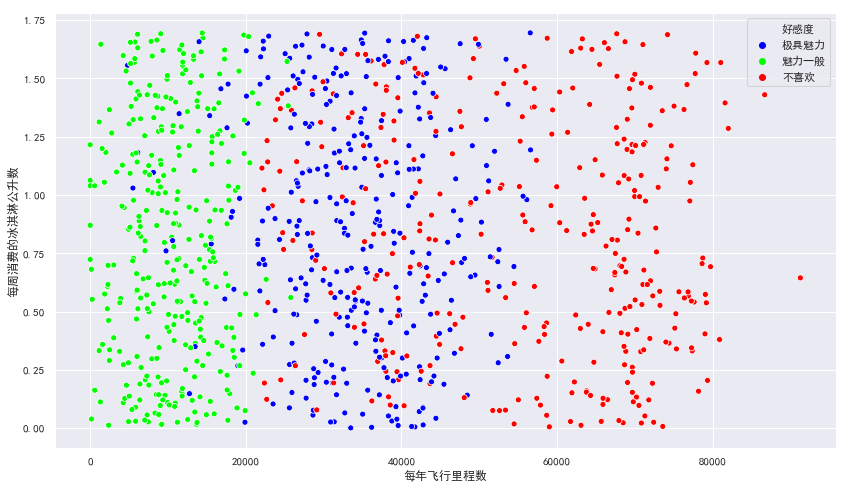

In [14]:
# 可以看到每周消费的冰淇淋公升数这个属性的影响不大
plt.figure(figsize=(14,8))
sns.scatterplot(x="每年飞行里程数", y="每周消费的冰淇淋公升数",
                hue=data_df["好感度"].map({1:"不喜欢",2:"魅力一般",3:"极具魅力"}),
                data=data_df,
                palette= {"不喜欢":"#ff0000","魅力一般":"#00ff00","极具魅力":"#0000ff"})

## 手写实现

In [15]:
data_df.sample(5)

,每年飞行里程数,玩视频游戏所耗时间百分比,每周消费的冰淇淋公升数,好感度
820,24091,2.317302,1.411137,1
413,36198,0.000000,0.116525,1
684,66087,6.596604,1.653574,1
635,65479,12.746636,1.560352,1
558,36759,10.861859,1.155054,3


In [16]:
data_df.describe()

,每年飞行里程数,玩视频游戏所耗时间百分比,每周消费的冰淇淋公升数,好感度
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,33635.421000,6.559961,0.832073,1.985000
std,21957.006833,4.243618,0.497239,0.818196
min,0.000000,0.000000,0.001156,1.000000
25%,13796.000000,2.933963,0.408995,1.000000
50%,31669.000000,6.595204,0.809420,2.000000
75%,47716.250000,10.056500,1.272847,3.000000
max,91273.000000,20.919349,1.695517,3.000000


In [17]:
# DataFrame转ndarray
x = data_df.iloc[:,0:-1].values
x.shape

(1000, 3)

In [18]:
y = data_df.iloc[:,-1].values
y.shape

(1000,)

### 数据归一化
数据归一化

In [19]:
x.min(axis=0)

array([0.      , 0.      , 0.001156])

In [20]:
x.max(axis=0)

array([9.1273000e+04, 2.0919349e+01, 1.6955170e+00])

In [21]:
x.max(axis=0) - x.min(axis=0)

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [22]:
(x - x.min(axis=0)) / ( x.max(axis=0) - x.min(axis=0) )

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [23]:
def autoNorm(dataSet):
    """
    Desc:
        归一化特征值，消除特征之间量级不同导致的影响
    parameter:
        dataSet: 数据集
    return:
        归一化后的数据集 normDataSet. ranges和minVals即最小值与范围，并没有用到

    归一化公式：
        Y = (X-Xmin)/(Xmax-Xmin)
        其中的 min 和 max 分别是数据集中的最小特征值和最大特征值。该函数可以自动将数字特征值转化为0到1的区间。
    """
    # 计算每种属性的最大值、最小值、范围
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 极差
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    # 生成与最小值之差组成的矩阵
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    # 将最小值之差除以范围组成矩阵
    normDataSet = normDataSet / np.tile(ranges, (m, 1))  # element wise divide
    return normDataSet, ranges, minVals

In [24]:
def autoNorm2(dataSet):
    # 直接利用数组的广播即可，不用补齐数组
    minVals = x.min(axis=0)
    maxVals = x.max(axis=0)
    ranges = maxVals - minVals
    normDataSet = (x - minVals) / ranges
    return normDataSet, ranges, minVals

In [25]:
# 可以看到，广播的算法更方便也好理解
autoNorm(x)[0] == autoNorm2(x)[0]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [26]:
x_norm, ranges, minVals = autoNorm2(x)

### 划分train、test

In [27]:
# 0.1作为测试集
numTest = int(x_norm.shape[0] * 0.1)
numTrain = x_norm.shape[0] - numTest
numTrain

900

In [28]:
# 注意，就是在这个写错了(没有用归一化的数据)，造成第一次写的与用sklearn测试的相差加到
"""
x_train, x_test = x[:numTrain,:], x[numTrain:,:]
y_train, y_test = y[:numTrain], y[numTrain:]
"""
x_train, x_test = x_norm[:numTrain,:], x_norm[numTrain:,:]
y_train, y_test = y[:numTrain], y[numTrain:]

### 计算预测

In [29]:
import collections

In [30]:
errorCount = 0
rst_ys = []
for item_x,item_y in zip(x_test,y_test):
    square_sum = np.sum(np.square(x_train - item_x), axis=1)    
    distances = np.sqrt(square_sum)
    # 取距离最近的k个的索引，这里用的是几何距离。
    sortedIndexs = distances.argsort()[0:5]
    counter = collections.Counter(y_train[sortedIndexs])
    rst = sorted([item[::-1] for item in counter.items()], reverse=True)[0]
    rst_y =  rst[1]
    rst_ys.append(rst_y)
    #print("the classifier came back with: %d, the real answer is: %d" % (rst_y, item_y))
    if (rst_y != item_y):  
        errorCount += 1

print("the total error rate is: %f" % (errorCount / float(len(y_test))))
print(errorCount)

print("准确率为：%0.4f" % (y_test == np.array(rst_ys)).mean() )

the total error rate is: 0.050000
5
准确率为：0.9500


### collections.Counter测试

In [31]:
names = ['a','b','b','c','d','b','a']
counter = collections.Counter(names)

In [32]:
counter

Counter({'a': 2, 'b': 3, 'c': 1, 'd': 1})

In [33]:
counter.items()

dict_items([('a', 2), ('b', 3), ('c', 1), ('d', 1)])

In [34]:
sorted(counter.items())

[('a', 2), ('b', 3), ('c', 1), ('d', 1)]

In [35]:
[item[::-1] for item in counter.items()]

[(2, 'a'), (3, 'b'), (1, 'c'), (1, 'd')]

In [36]:
sorted([item[::-1] for item in counter.items()], reverse=True)

[(3, 'b'), (2, 'a'), (1, 'd'), (1, 'c')]

## 使用sklearn

In [37]:
from sklearn import neighbors 
from sklearn.preprocessing import MinMaxScaler

### 归一化

In [38]:
x_train, x_test = x[:numTrain,:], x[numTrain:,:]
y_train, y_test = y[:numTrain], y[numTrain:]

In [39]:
x_train.shape, x_test.shape

((900, 3), (100, 3))

In [40]:
x_train[:3]

array([[4.092000e+04, 8.326976e+00, 9.539520e-01],
       [1.448800e+04, 7.153469e+00, 1.673904e+00],
       [2.605200e+04, 1.441871e+00, 8.051240e-01]])

In [41]:
# 归一化
mm = MinMaxScaler()
mm.fit(x_train)
x_mm_train = mm.transform(x_train)

In [42]:
x_mm_train[:3]

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629]])

In [43]:
x_mm_test = mm.transform(x_test)
x_mm_test[0:3]

array([[0.51376639, 0.17031964, 0.26218144],
       [0.08959933, 0.15442555, 0.78527657],
       [0.6111665 , 0.17268931, 0.91524474]])

### 训练预测

In [44]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [45]:
#用KNN的分类器进行建模，这里利用的默认的参数
knn.fit(x_mm_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
# 预测
y_predict = knn.predict(x_mm_test)

In [47]:
# 100个，预测对了95个
pd.value_counts(y_predict == y_test)

True     95
False     5
dtype: int64

In [48]:
# 准确率
(y_predict == y_test).mean()

0.95

In [49]:
# 算法提供的评分，和我们的计算方式一样
# Returns the mean accuracy on the given test data and labels.
knn.score(x_mm_test, y_test)

0.95

In [50]:
# 这个方法返回的是预测的概率
predict_proba = knn.predict_proba(x_mm_test)
predict_proba[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [51]:
y_predict[:5]

array([1, 2, 1, 2, 2], dtype=int64)

In [52]:
# predict_proba.argmax(axis=1) + 1和y_predict是一样的
( (predict_proba.argmax(axis=1) + 1) == y_predict ).all()

True

### 使用sklearn的train_test_split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(MinMaxScaler().fit_transform(x), y, test_size=0.1)

In [55]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((900, 3), (100, 3), (900,), (100,))

In [56]:
 knn = neighbors.KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)

score = knn.score(x_test, y_test)

print("准确率：%.4f" % (y_predict==y_test).mean() )
print("score：%.4f" % score )

准确率：0.9700
score：0.9700


train_test_split 返回训练集和测试集，一次可以分割多个集合

In [57]:
train_df,test_df  = train_test_split(data_df, test_size=0.1)

In [58]:
# 默认是shuffle的
train_df.head()

,每年飞行里程数,玩视频游戏所耗时间百分比,每周消费的冰淇淋公升数,好感度
512,2225,6.375275,0.608040,2
203,8847,3.168365,0.053993,2
333,33170,1.230540,1.331674,1
895,22240,10.169548,1.660104,3
572,6110,3.057842,1.631262,2


In [59]:
# 多个集合同时切分取的是相同的位置的数据。
x_train,x_test,y_train,y_test = train_test_split(data_df.iloc[:,:-1], data_df.iloc[:,-1], test_size=0.1)

In [60]:
x_train.head()

,每年飞行里程数,玩视频游戏所耗时间百分比,每周消费的冰淇淋公升数
264,37422,11.029636,0.505769
890,65821,4.106727,1.085669
974,18338,5.238800,1.253646
970,53711,12.149747,1.389088
179,39514,0.000000,0.481918


In [61]:
y_train.head()

264    3
890    1
974    2
970    3
179    1
Name: 好感度, dtype: int64

### 使用网格搜索

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# 进行标准化
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [64]:
# 通过网格搜索,n_neighbors为参数列表
param = {"n_neighbors": [3, 4 ,5, 6, 7]}

In [65]:
# estimator流程
knn = neighbors.KNeighborsClassifier()

# cv:k-折交叉验证
gs = GridSearchCV(knn, param, cv=5)

# 建立模型
gs.fit(x_train,y_train)

# 预测数据
print(gs.score(x_test,y_test))

0.97


使用归一化(在这里标准化和归一化处理后预测的结果基本一样)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# 进行归一化
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

# estimator流程
knn = neighbors.KNeighborsClassifier()

# 通过网格搜索,n_neighbors为参数列表
param = {"n_neighbors": [3, 4 ,5, 6, 7]}

# cv:k-折交叉验证
gs = GridSearchCV(knn, param, cv=5)

# 建立模型
gs.fit(x_train,y_train)

# 预测数据
print(gs.score(x_test,y_test))

0.94


In [67]:
# 最好的模型
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
gs.best_estimator_.score(x_test,y_test)

0.94

In [69]:
gs.best_params_

{'n_neighbors': 5}

### 精确度/召回率

In [70]:
from sklearn.metrics import classification_report

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# 进行归一化
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights="distance")

knn.fit(x_train, y_train)

y_predict = knn.predict(x_test)

knn.score(x_test, y_test)

0.95

In [72]:
pd.value_counts(y_predict == y_test)

True     95
False     5
dtype: int64

In [73]:
print( classification_report(y_test, y_predict) )

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        42
           2       0.94      0.94      0.94        32
           3       0.92      0.88      0.90        26

    accuracy                           0.95       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100



In [74]:
print( classification_report(y_test, y_predict, target_names=['不喜欢', '魅力一般', '极具魅力']) )

              precision    recall  f1-score   support

         不喜欢       0.98      1.00      0.99        42
        魅力一般       0.94      0.94      0.94        32
        极具魅力       0.92      0.88      0.90        26

    accuracy                           0.95       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100



In [75]:
# 召回率我还是会算的
pd.crosstab(pd.Series(y_test, name="true"), pd.Series(y_predict, name="predict"))

predict,1,2,3
true,,,
1,42,0,0
2,0,30,2
3,1,2,23


In [76]:
df = pd.crosstab(pd.Series(y_test, name="true"), pd.Series(y_predict, name="predict"))

In [77]:
# 召回率:预测对的正例占实际正例的比例
{index: row.loc[index]/float(row.sum())   for index,row in df.iterrows()}

{1: 1.0, 2: 0.9375, 3: 0.8846153846153846}

In [78]:
# 精确度:预测对的正例占预测正例的比例
{column: df.loc[:,column].loc[column]/float(df.loc[:,column].sum())  for column in df.columns}

{1: 0.9767441860465116, 2: 0.9375, 3: 0.92}